# 1. Dataset Selection:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('movies_metadata.csv', low_memory=False)

In [ ]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# 2. Data Preprocessing:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

df = pd.read_csv('movies_metadata.csv', low_memory=False)
profile = ProfileReport(df, title="Movies Metadata Report", explorative=True)
profile.to_file("movies_metadata_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 24/24 [00:14<00:00,  1.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Check for duplicates
df.duplicated().sum()

np.int64(17)

In [ ]:
#Drop duplicates
df = df.drop_duplicates()

In [ ]:
#Drop unusable columns
cols_to_drop = [
    'id', 'imdb_id', 'poster_path', 'homepage',
    'tagline', 'original_title', 'overview',
    'belongs_to_collection', 'spoken_languages', 'video', 'adult'
]

df = df.drop(columns=cols_to_drop)


In [ ]:
# Convert budget and popularity to numeric
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Replace 0 budget and revenue with NaN (treat as missing)
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)


In [ ]:
# Drop rows with missing target (revenue)
df = df.dropna(subset=['revenue'])

# Fill missing runtime with median
df.loc[:, 'runtime'] = df['runtime'].fillna(df['runtime'].median())

# Fill missing status and original_language with mode
df.loc[:, 'status'] = df['status'].fillna(df['status'].mode()[0])
df.loc[:, 'original_language'] = df['original_language'].fillna(df['original_language'].mode()[0])

# Drop rows where budget or popularity is still missing
df = df.dropna(subset=['budget', 'popularity'])


# 3. Feature Engineering:

In [ ]:
#From release_date Extract year, month, decade:
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_decade'] = (df['release_year'] // 10) * 10


In [ ]:
#From genres Convert to binary features (one-hot encode top genres). First parse the JSON-like text
import ast

# Extract list of genres
def get_genres(x):
    try:
        genres = ast.literal_eval(x)
        return [d['name'] for d in genres]
    except:
        return []

df['genre_list'] = df['genres'].apply(get_genres)

# Extract top N genres
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(df['genre_list']), columns=mlb.classes_, index=df.index)

df = pd.concat([df, genre_dummies], axis=1)


In [ ]:
#Because budget and revenue are highly skewed model log_revenue instead of revenue — models handle log targets better.
df['log_budget'] = np.log1p(df['budget'])
df['log_revenue'] = np.log1p(df['revenue'])

#gives more weight to high-rated movies with many votes.
df['vote_ratio'] = df['vote_average'] * np.log1p(df['vote_count'])


In [ ]:
# Define features
features = [
    'log_budget', 'popularity', 'runtime',
    'vote_average', 'vote_count',
    'release_year', 'release_month', 'release_decade'
] + list(mlb.classes_)  # add genre columns


# 4. Data Visualization:

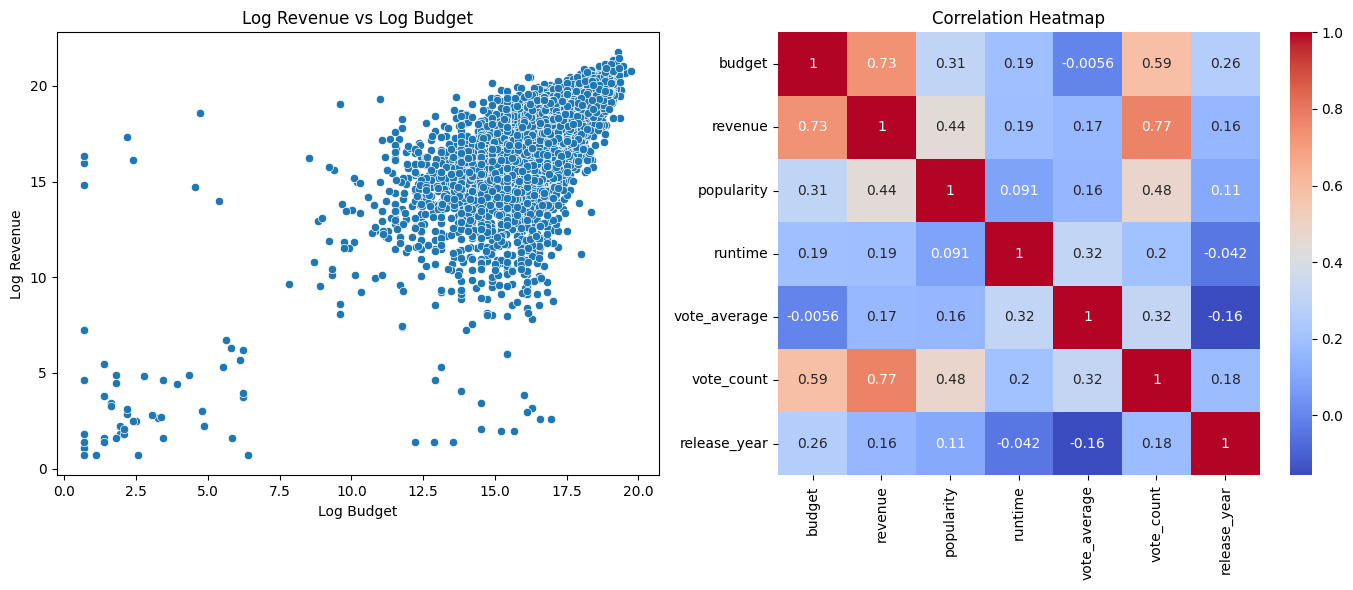

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ Scatterplot: Log Revenue vs Log Budget
sns.scatterplot(x='log_budget', y='log_revenue', data=df, ax=axes[0])
axes[0].set_title('Log Revenue vs Log Budget')
axes[0].set_xlabel('Log Budget')
axes[0].set_ylabel('Log Revenue')

# 2️⃣ Correlation Heatmap
corr_cols = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_year']
corr = df[corr_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()


# 5. Model Selection:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# Split data
X = df[features]
y = df['log_revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


# 6. Model Evaluation:

In [ ]:
# Evaluate
mae= mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

RMSE: 1.680207156920017
MAE: 1.149279563074576
R2: 0.5807934098108403


In [ ]:
#try a random forest model
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = np.mean(np.abs(y_test - y_pred_rf))
r2_rf = rf_model.score(X_test, y_test)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R2: {r2_rf}")


Random Forest RMSE: 1.4814265220469618
Random Forest MAE: 0.9661016619148776
Random Forest R2: 0.6741162748736016


In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Display top features
print(feature_importance.head(15))


vote_count        0.373942
log_budget        0.333743
release_year      0.059094
runtime           0.054103
vote_average      0.043210
popularity        0.041837
release_month     0.024611
Drama             0.007019
Thriller          0.006500
Crime             0.006010
release_decade    0.005798
Comedy            0.005399
Action            0.005075
History           0.004858
Romance           0.003960
dtype: float64


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid (small grid to test)
param_grid_small = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create model
rf = RandomForestRegressor(random_state=42)
# Grid search with smaller grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_small,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict
y_pred_best = best_rf.predict(X_test)

# Evaluate
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = np.mean(np.abs(y_test - y_pred_best))
r2_best = best_rf.score(X_test, y_test)

print(f"Best RF RMSE: {rmse_best}")
print(f"Best RF MAE: {mae_best}")
print(f"Best RF R2: {r2_best}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best RF RMSE: 1.4568487677053414
Best RF MAE: 0.9513197974831255
Best RF R2: 0.6848397888646252


Model Selected: Random Forest Regressor

    Justification:

    Best R² score (0.6848) and lowest RMSE (1.4568)

    Outperformed XGBoost and baseline models

    Handles non-linearity and outliers well, no strong assumptions about data distribution

    Implications:

    Most of revenue variance is explained by features like budget, popularity, runtime, and genre

    Model is useful for revenue estimation but leaves room for improvement

    Better results may require richer data (e.g., cast, crew, marketing spend)



# 7. Project Submission

Challenges Faced:

    Mixed and malformed data types (e.g., budget, popularity):

    Fixed by converting to numeric with error coercion.

    High missing values in key columns:

    Dropped or imputed based on median/mode as appropriate.

    Complex nested structures in genres and production fields:

    Parsed using ast and encoded top genres with MultiLabelBinarizer.

    Overfitting during model tuning

    Identified via performance drop post-GridSearch; stuck with better-performing Random Forest.

    Outcome: Clean preprocessing and focused feature selection led to a strong, interpretable model.


Dataset Used
    
    Movies_metadata.csv from the MovieLens + TMDB dataset on Kaggle.


Project Goal
    
    Predict movie revenue based on metadata.

Reason for Interest
    
    Love for movies, Real-world, messy dataset with diverse features — good for applying full ML workflow (cleaning, feature engineering, modeling).

Steps Taken

    Explored and cleaned data

    Engineered key features (e.g., log budget, genres, release year)

    Evaluated multiple models and selected the one with best performance

    Model Choice: Random Forest was chosen for its strong results without needing heavy tuning or assumptions.

